## Chapter 2. Data and Sampling Distributions

필요한 패키지들을 먼저 설치해줍니다.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
DATA = 'c:\\Users\\jmjwj\\workspace\\HD'
LOANS_INCOME_CSV = DATA + '\\loans_income.csv'
SP500_DATA_CSV = DATA + '\\sp500_data.csv.gz'

## sample

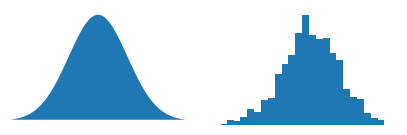

In [3]:
np.random.seed(seed=1) # seed : 랜덤자료의 재현성을 위해 설정함.

x = np.linspace(-3, 3, 300) # (-3, 3)을 300개의 길이가 같은 구간으로 만듬(등차수열 생성)
xsample = stats.norm.rvs(size=1000) # normal 분포로부터 1000개의 랜덤샘플을 뽑기

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5)) 
# 도화지 그리기. 이 도화지는 크기가 가로5, 세로 1.5 이고 가로로 두개의 그래프를 그릴 수 있음

# 첫번째 그래프에 그리자.
ax = axes[0] 
ax.fill(x, stats.norm.pdf(x))

#customizing
ax.set_axis_off() 
ax.set_xlim(-3, 3)

#두번째 그래프
ax = axes[1]
ax.hist(xsample, bins=30)

#customizing
ax.set_axis_off()
ax.set_xlim(-3, 3)

# ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
# 위치 조정
plt.show()

## 

## Sampling Distribution of a Statistic


In [4]:
loans_income = pd.Series(pd.read_csv(LOANS_INCOME_CSV).x)

# 데이터 1000개를 랜덤추출
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

# 크기가 5인 표본의 평균을 구하는 것을 1000회 반복
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

# 크기가 20인 표본의 평균을 구하는 것을 1000회 반복
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

print(results.head())
print(results.tail())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data
       income        type
995  70262.50  Mean of 20
996  75054.00  Mean of 20
997  79831.55  Mean of 20
998  69985.40  Mean of 20
999  70359.20  Mean of 20


c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_21008\3131367493.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


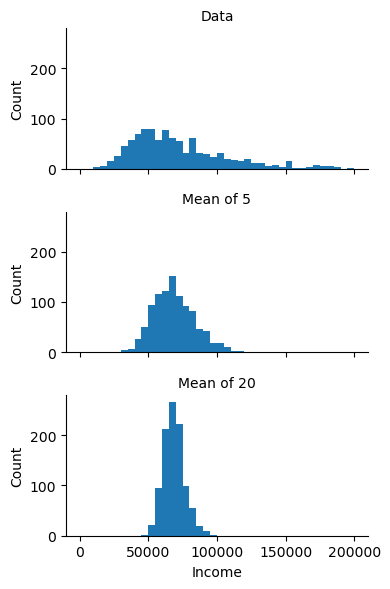

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)

g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## Bootstrap

In [6]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

#결과 산출
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')



Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830748


## Confidence Intervals
### (using Bootstrap Samples)

68760.51844
55734.1


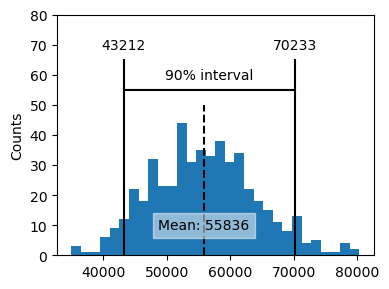

In [7]:
#loans_income의 평균에 대한 신뢰구간을 Bootstrap 을 이용해서 구해보자.

print(loans_income.mean())
np.random.seed(seed=3)  

# create a sample of 20 loan income data(비복원추출)
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())


results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)
#sample20에서 재표집(20개를 복원추출)하고, 각 재표본의 평균을 result에 저장한다.

confidence_interval = list(results.quantile([0.05, 0.95]))

#그래프 그리기.

ax = results.plot.hist(bins=30, figsize=(4, 3)) #히스토그램(파란색부분)
ax.plot(confidence_interval, [55, 55], color='black') #가로선

for x in confidence_interval: 
    ax.plot([x, x], [0, 65], color='black') #세로선
    ax.text(x, 70, f'{x:.0f}',              #43212, 70233 숫자 쓴 것.
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval', #90% interval 텍스트
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean() 
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

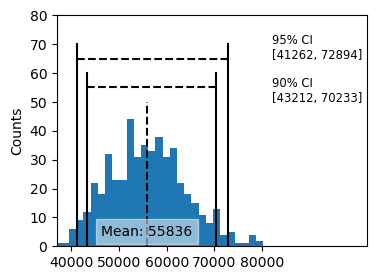

In [21]:
#위와 방식이 같다.

np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()